<a href="https://colab.research.google.com/github/BandaAkshitha/Natural-Language-Processing/blob/main/NLP_lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install gensim
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 63.5 MB/s eta 0:00:00


In [5]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")
print("Model loaded successfully!")
print("Vocabulary size:", len(model.key_to_index))

word = "king"
print(f"\nVector for '{word}':\n", model[word])
print("Vector shape:", model[word].shape)

[==================================================] 100.0% 128.1/128.1MB downloaded
Model loaded successfully!
Vocabulary size: 400000

Vector for 'king':
 [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0

In [6]:
pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("boy", "girl"),
    ("apple", "banana"),
    ("teacher", "student"),
    ("india", "china"),
    ("computer", "laptop"),
    ("river", "water")
]

print("Word Similarities:\n")

for w1, w2 in pairs:
    sim = model.similarity(w1, w2)
    print(f"{w1} - {w2} : {sim:.4f}")

Word Similarities:

doctor - nurse : 0.7522
cat - dog : 0.8798
car - bus : 0.7373
king - queen : 0.7508
boy - girl : 0.9176
apple - banana : 0.5054
teacher - student : 0.8083
india - china : 0.5997
computer - laptop : 0.7024
river - water : 0.6306


In [7]:
test_words = ["king", "university", "computer", "india", "doctor"]

for word in test_words:
    print(f"\nTop similar words to '{word}':")
    for similar_word, score in model.most_similar(word, topn=5):
        print(f"  {similar_word} ({score:.4f})")


Top similar words to 'king':
  prince (0.7682)
  queen (0.7508)
  son (0.7021)
  brother (0.6986)
  monarch (0.6978)

Top similar words to 'university':
  college (0.8294)
  harvard (0.8156)
  yale (0.8114)
  professor (0.8104)
  graduate (0.7993)

Top similar words to 'computer':
  computers (0.8752)
  software (0.8373)
  technology (0.7642)
  pc (0.7366)
  hardware (0.7290)

Top similar words to 'india':
  pakistan (0.8370)
  indian (0.7802)
  delhi (0.7712)
  bangladesh (0.7662)
  lanka (0.7639)

Top similar words to 'doctor':
  physician (0.7673)
  nurse (0.7522)
  dr. (0.7175)
  doctors (0.7081)
  patient (0.7074)


In [8]:
analogies = [
    ("king", "man", "woman"),
    ("paris", "france", "india"),
    ("teacher", "school", "hospital")
]

for a, b, c in analogies:
    result = model.most_similar(positive=[a, c], negative=[b], topn=1)
    print(f"\n{a} - {b} + {c} = {result[0][0]}")


king - man + woman = queen

paris - france + india = delhi

teacher - school + hospital = nurse


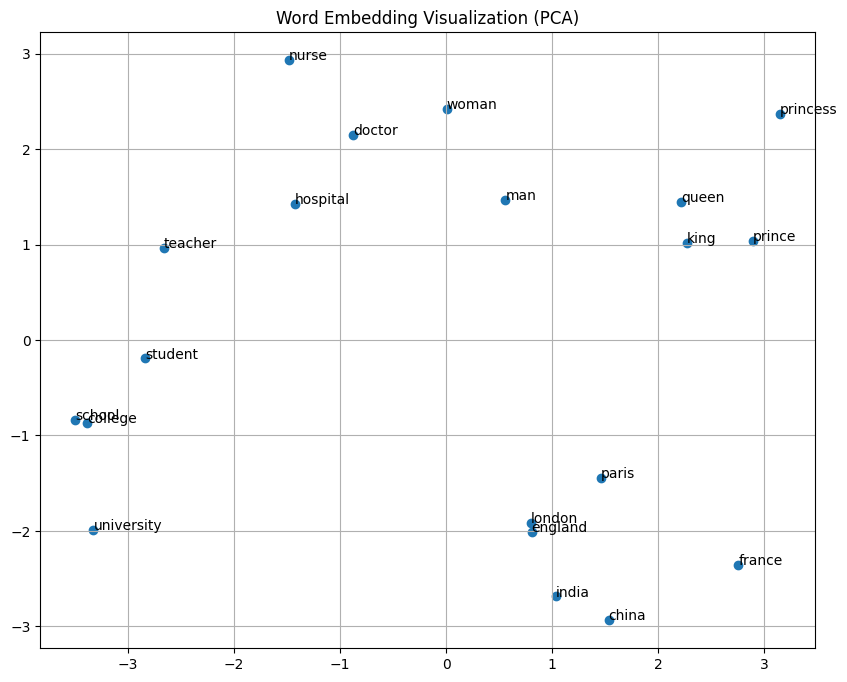

In [9]:
words = [
    "king","queen","man","woman","prince","princess",
    "doctor","nurse","hospital","teacher","student",
    "school","college","university","india","china",
    "paris","france","london","england"
]

# Get vectors
vectors = np.array([model[w] for w in words])

# Reduce to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10,8))
plt.scatter(reduced[:,0], reduced[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced[i,0], reduced[i,1]))

plt.title("Word Embedding Visualization (PCA)")
plt.grid(True)
plt.show()